<a href="https://colab.research.google.com/github/Mihaja359/Data-science-/blob/clustering/CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Étape 1 : Nettoyage et prétraitement
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Charger les données
df = pd.read_csv('/Mall_Customers.csv')

# Supprimer l'identifiant
df = df.drop('CustomerID', axis=1)

# Encodage du genre : Male = 0, Female = 1
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Standardisation des variables numériques
scaler = StandardScaler()
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df_scaled = df.copy()
df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])

# Afficher les premières lignes du dataset traité
df_scaled.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,-1.424569,-1.738999,-0.434801
1,0,-1.281035,-1.738999,1.195704
2,1,-1.352802,-1.700830,-1.715913
3,1,-1.137502,-1.700830,1.040418
4,1,-0.563369,-1.662660,-0.395980


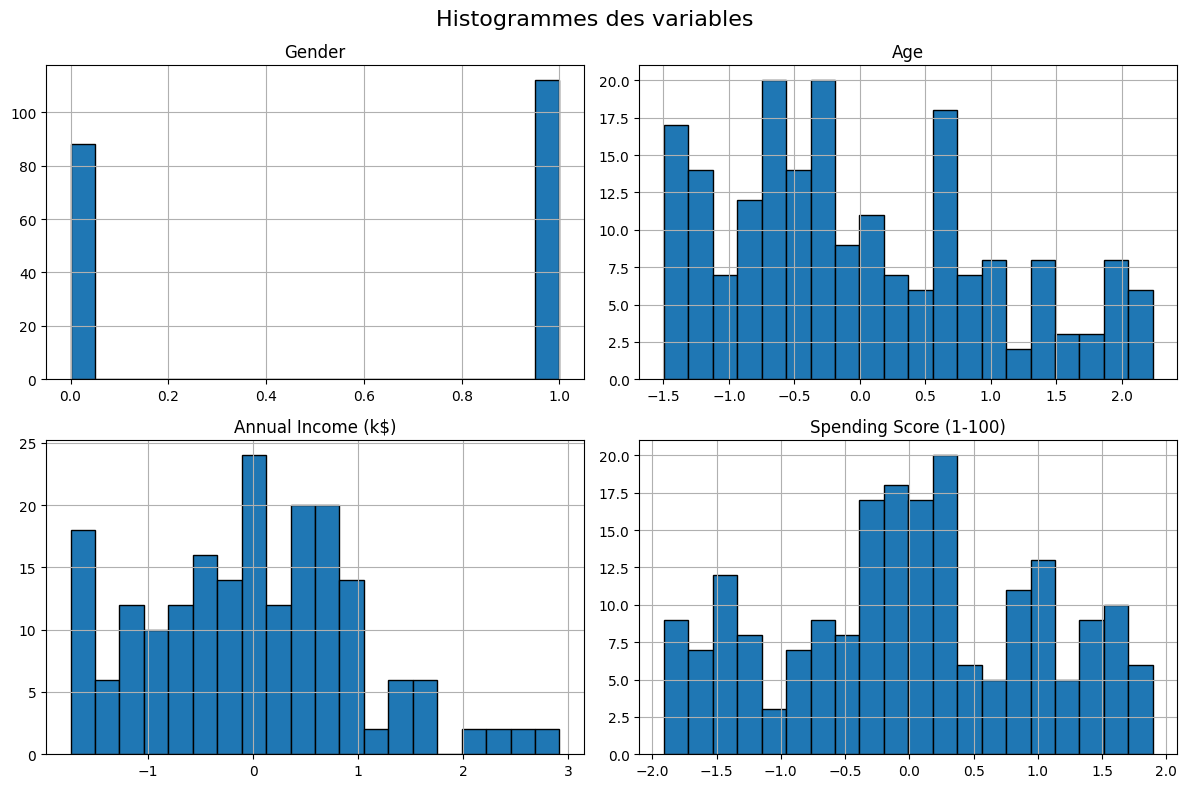

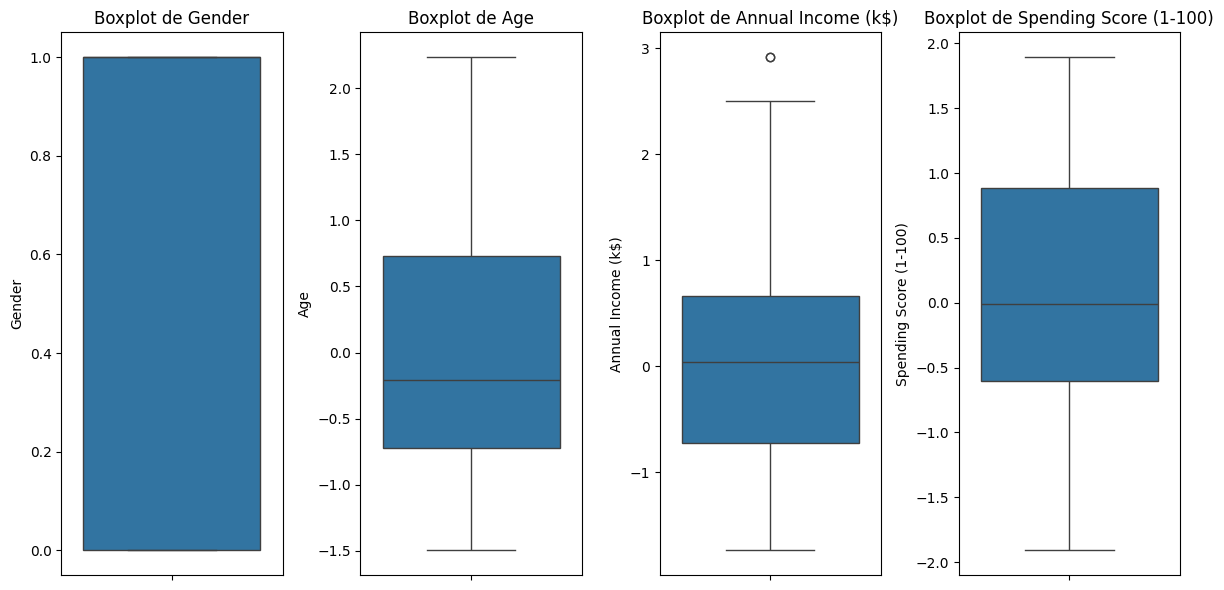

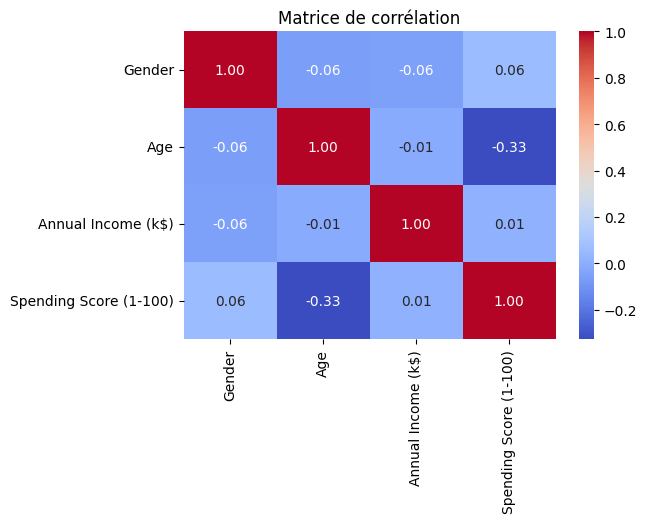

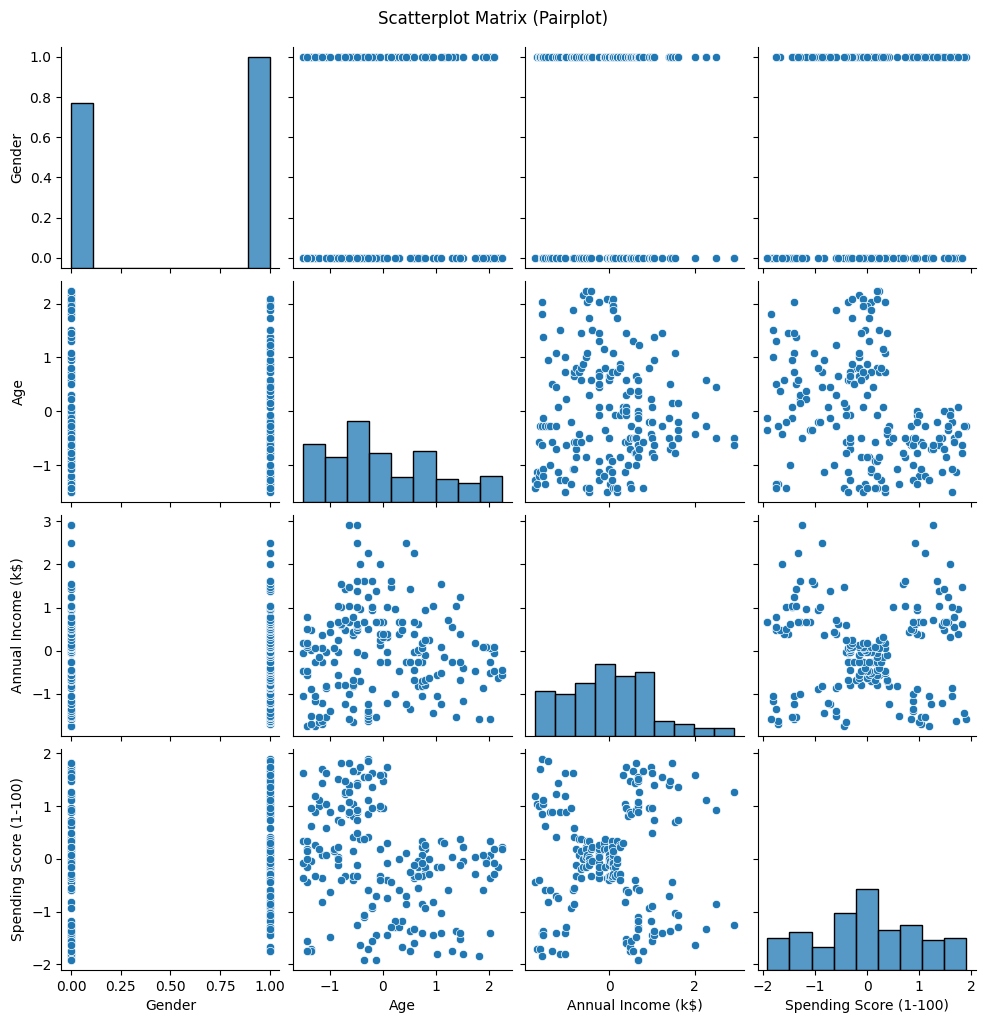

In [ ]:
# Étape 2 : Analyse exploratoire (EDA)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Histogrammes pour chaque variable
df_scaled.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle('Histogrammes des variables', fontsize=16)
plt.tight_layout()
plt.show()

# Boxplots pour chaque variable
plt.figure(figsize=(12, 6))
for i, col in enumerate(df_scaled.columns):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df_scaled[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

# Matrice de corrélation
plt.figure(figsize=(6, 4))
corr_matrix = df_scaled.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

# Scatterplot matrix (ou pairplot)
sns.pairplot(df_scaled)
plt.suptitle('Scatterplot Matrix (Pairplot)', y=1.02)
plt.show()


In [ ]:
# Étape 3 : Feature engineering / sélection
import numpy as np

# On repart du DataFrame original non standardisé pour créer une classe d'âge
df_engineered = df.copy()

# Création d'une nouvelle colonne : classe d'âge
def age_group(age):
    if age < 25:
        return 'Jeune'
    elif age < 50:
        return 'Adulte'
    else:
        return 'Senior'

df_engineered['AgeGroup'] = df_engineered['Age'].apply(age_group)

# Afficher quelques lignes avec la classe d’âge
df_engineered[['Age', 'AgeGroup']].head(10)




,Age,AgeGroup
0,19,Jeune
1,21,Jeune
2,20,Jeune
3,23,Jeune
4,31,Adulte
5,22,Jeune
6,35,Adulte
7,23,Jeune
8,64,Senior
9,30,Adulte


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('AgeGroup').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['AgeGroup'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Age', y='AgeGroup', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

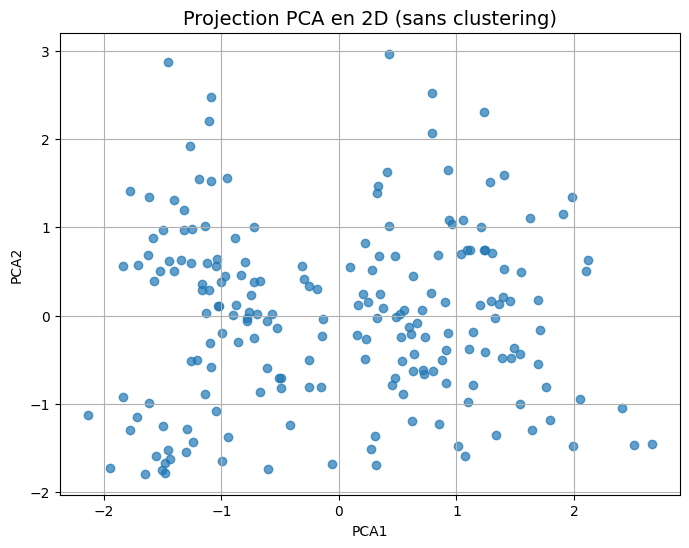

Variance expliquée par chaque composante :
[0.4095285 0.3081674]
Variance totale expliquée : 0.72


In [ ]:
# Étape 4 : Réduction de dimension avec PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# On applique la PCA sur les données standardisées
features_for_pca = df_scaled.copy()

# PCA à 2 composantes
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_for_pca)

# Création d’un DataFrame PCA
df_pca = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Visualisation 2D
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], alpha=0.7)
plt.title('Projection PCA en 2D (sans clustering)', fontsize=14)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()

# Affichage de la variance expliquée
print("Variance expliquée par chaque composante :")
print(pca.explained_variance_ratio_)
print(f"Variance totale expliquée : {sum(pca.explained_variance_ratio_):.2f}")


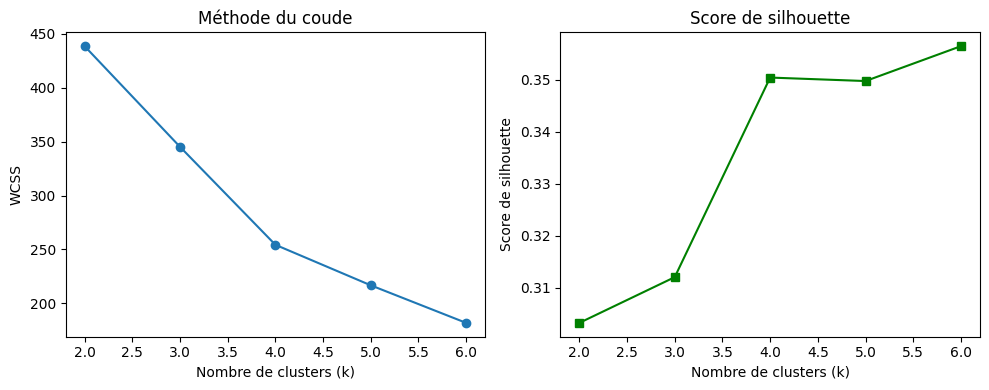

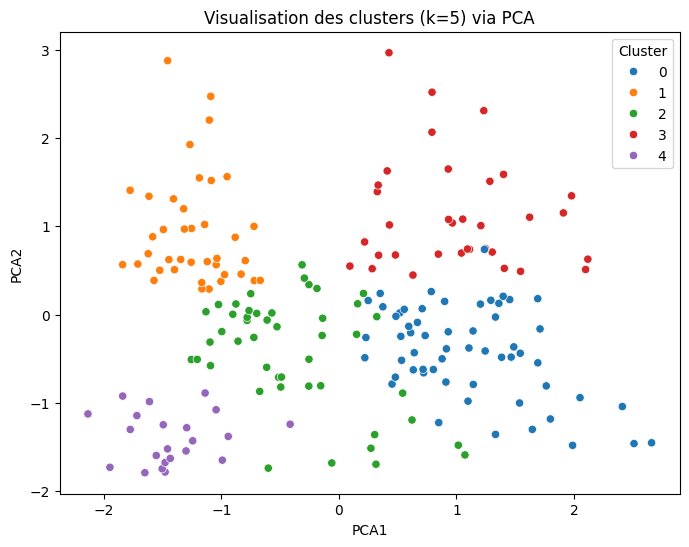

In [ ]:
# Étape 5 : Clustering avec K-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []  # Within-cluster sum of squares
silhouette_scores = []

# Test des k de 2 à 6
K = range(2, 7)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Affichage de la courbe du coude
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(K, wcss, marker='o')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('WCSS')

# Affichage du score de silhouette
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='s', color='green')
plt.title('Score de silhouette')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score de silhouette')

plt.tight_layout()
plt.show()

# Choix d’un k optimal (exemple : k=5 si on suit souvent la silhouette ou coude)
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_final.fit_predict(df_scaled)

# Ajout des labels au DataFrame PCA pour affichage
df_pca['Cluster'] = clusters

# Visualisation des clusters sur PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title(f'Visualisation des clusters (k={optimal_k}) via PCA')
plt.show()


Centroides (profils moyens) des clusters :
           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.568966  55.551724           48.482759               41.775862
1        0.538462  32.692308           86.538462               82.128205
2        0.659574  27.957447           50.000000               44.638298
3        0.411765  41.264706           88.500000               16.764706
4        0.590909  25.272727           25.727273               79.363636

Nombre de clients par cluster :
Cluster
0    58
1    39
2    47
3    34
4    22
Name: count, dtype: int64


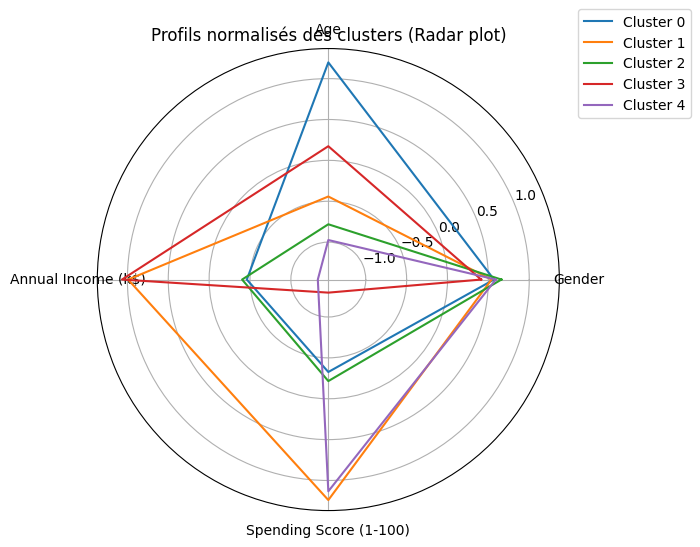

In [ ]:
# Étape 6 : Interprétation des clusters

# Ajouter les labels de cluster au DataFrame original
df_labeled = df.copy()
df_labeled['Cluster'] = clusters

# Calcul des centroïdes : moyenne de chaque variable par cluster
cluster_profiles = df_labeled.groupby('Cluster').mean(numeric_only=True)
print("Centroides (profils moyens) des clusters :")
print(cluster_profiles)

# Répartition des clients par cluster
cluster_counts = df_labeled['Cluster'].value_counts().sort_index()
print("\nNombre de clients par cluster :")
print(cluster_counts)

# Visualisation radar (optionnelle) pour comparer les profils
import numpy as np

# Normalisation des valeurs pour le radar plot
cluster_scaled_profiles = cluster_profiles.copy()
cluster_scaled_profiles[numerical_features] = scaler.transform(cluster_profiles[numerical_features])

# Radar plot pour chaque cluster
import matplotlib.pyplot as plt

labels = cluster_scaled_profiles.columns
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8, 6))
for i in range(len(cluster_scaled_profiles)):
    values = cluster_scaled_profiles.iloc[i].tolist()
    values += values[:1]
    plt.polar(angles, values, label=f'Cluster {i}')

plt.xticks(angles[:-1], labels)
plt.title("Profils normalisés des clusters (Radar plot)")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


/tmp/ipython-input-9-3063199541.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df_labeled, palette='tab10')


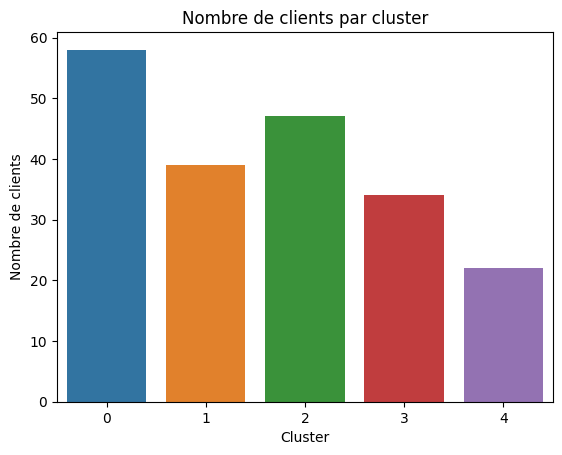

Résumé des profils clients par cluster :



,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.568966,55.551724,48.482759,41.775862
1,0.538462,32.692308,86.538462,82.128205
2,0.659574,27.957447,50.000000,44.638298
3,0.411765,41.264706,88.500000,16.764706
4,0.590909,25.272727,25.727273,79.363636


Fichier clients_segmentés.csv exporté.


In [ ]:
# Étape 7 : Conclusion – Synthèse

# Résumé visuel de la répartition
sns.countplot(x='Cluster', data=df_labeled, palette='tab10')
plt.title("Nombre de clients par cluster")
plt.xlabel("Cluster")
plt.ylabel("Nombre de clients")
plt.show()

# Description moyenne des clusters (pour interprétation)
print("Résumé des profils clients par cluster :\n")
display(cluster_profiles)

# Export possible pour présentation ou analyse future
df_labeled.to_csv('/content/clients_segmentés.csv', index=False)
print("Fichier clients_segmentés.csv exporté.")
